In [70]:
# ! pip install ipykernel
# ! pip install librosa



In [71]:
! pip install pyyaml h5py  

In [5]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

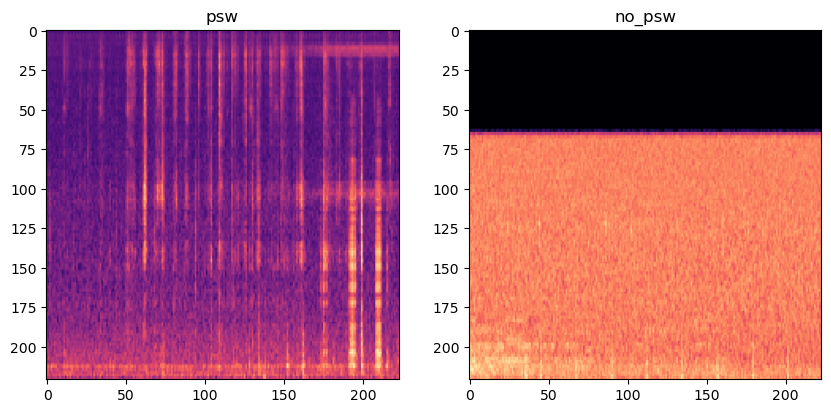

In [6]:
# Load the spectrogram images
spectrogram1 = 'spectro_data/psw_spectro/psw_1.png'
spectrogram2 = 'spectro_data/nopsw_spectro/nopsw_1.png'

spectrogram1 = Image.open(spectrogram1)
spectrogram2 = Image.open(spectrogram2)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(spectrogram1)
plt.title('psw')

plt.subplot(1, 2, 2)
plt.imshow(spectrogram2)
plt.title('no_psw')

plt.show()

In [74]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu

# ! pip install keras

# ! pip install opencv-python

# ! pip install numpy
# ! pip install matplotlib

# ! pip install scikit-learn

# ! pip install pandas


In [9]:
from keras.preprocessing import image

def load_images_from_path(path,label):
  images = []
  labels = []

  for file in os.listdir(path):

    # This function from keras.preprocessing.image loads an image from the specified file path and resizes it to the target size of 224x224 pixels with 3 channels (RGB).
    images.append(image.img_to_array(image.load_img(os.path.join(path,file),target_size=(224, 224, 3))))

    labels.append((label))

  return images,labels

def show_images(images):
  fig,axes = plt.subplots(1,8,figsize = (20,20), subplot_kw={'xticks': [],'yticks': []})

  for i,ax in enumerate(axes.flat):
    ax.imshow(images[i] / 255)

x = []
y = []

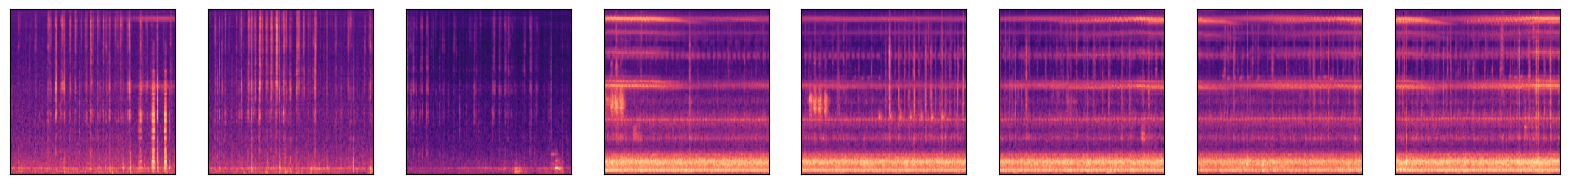

In [8]:
psw_spectro_path = 'spectro_data/psw_spectro/'

images, labels = load_images_from_path(psw_spectro_path,1)
show_images(images)

x += images
y += labels

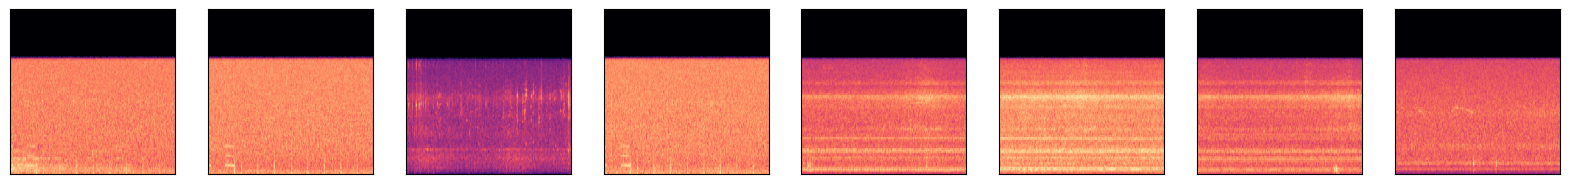

In [10]:
nopsw_spectro_path = 'spectro_data/nopsw_spectro/'

images, labels = load_images_from_path(nopsw_spectro_path,0)
show_images(images)

x += images
y += labels

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [18]:
import tensorflow
print(tensorflow.__version__)

2.16.1


In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 475ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step


In [80]:
# import pickle
# # Save the model to a pickle file
# with open('base_model.pkl', 'wb') as f:
#     pickle.dump(base_model, f)

# Save the entire model as a `.keras` zip archive.
base_model.save('base_model.keras')

In [81]:
# train_features

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense


model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\anskp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
import keras
print(keras.__version__)

3.3.3


In [83]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=5)

Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 136s 646ms/step - accuracy: 0.9602 - loss: 2.3589 - val_accuracy: 0.9989 - val_loss: 0.0318
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 130s 617ms/step - accuracy: 0.9944 - loss: 0.2026 - val_accuracy: 0.9967 - val_loss: 0.0715
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 132s 627ms/step - accuracy: 0.9995 - loss: 0.0379 - val_accuracy: 0.9956 - val_loss: 0.1937
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 130s 619ms/step - accuracy: 0.9966 - loss: 0.0260 - val_accuracy: 0.9900 - val_loss: 0.7806
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 128s 608ms/step - accuracy: 0.9967 - loss: 0.0908 - val_accuracy: 0.9967 - val_loss: 0.2418


In [84]:
# import pickle
# # Save the model to a pickle file
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

# Save the entire model as a `.keras` zip archive.
model.save('model.keras')

[]

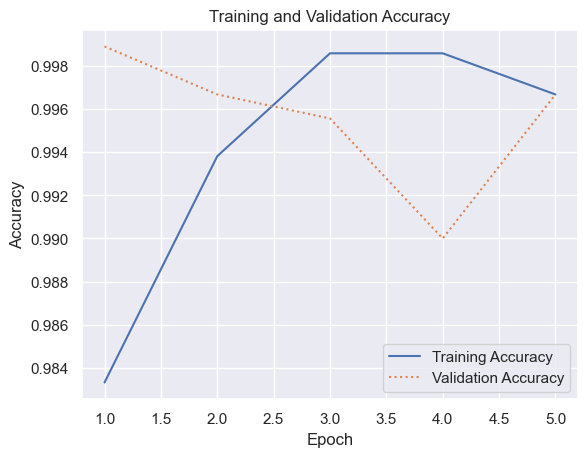

In [85]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


Text(110.44999999999997, 0.5, 'Actual label')

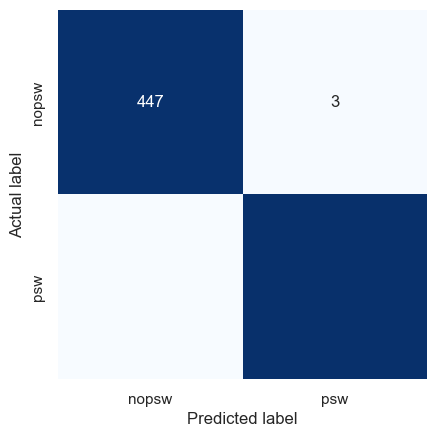

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['nopsw', 'psw']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [2]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    if not os.path.exists(audio_file):
        print(f"Error: File {audio_file} not found.")
        return

    y, sr = librosa.load(audio_file)
    print("Loaded audio file shape:", y.shape)
    print("Sampling rate:", sr)

    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    if not os.path.exists(os.path.dirname(image_file)):
        os.makedirs(os.path.dirname(image_file))
        print("folder created")

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        print("folder created")

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

import librosa
print(librosa.__version__)



0.10.2


In [88]:
import librosa
print(librosa.__version__)
create_spectrogram('Sounds/background/background_00.wav', 'Spectrograms/sample1_nopsw.png')

0.10.2
Loaded audio file shape: (220500,)
Sampling rate: 22050


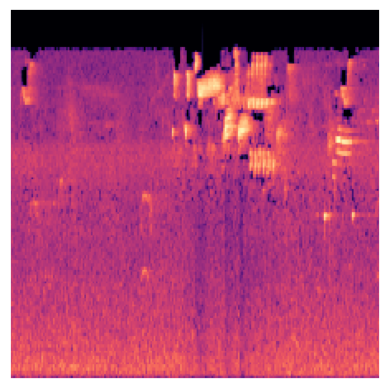

In [89]:
from keras.preprocessing import image
x = image.load_img('Spectrograms/sample1_nopsw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [90]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
nopsw: 1.0
psw: 1.339290067736698e-10


0.10.2
Loaded audio file shape: (220500,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
nopsw: 1.0
psw: 1.7046079300052856e-26


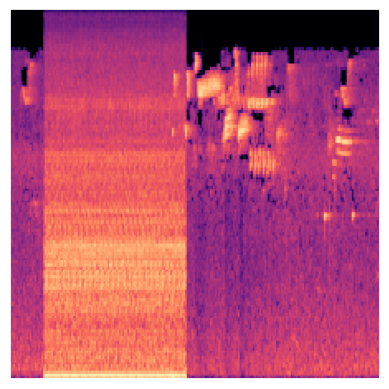

In [91]:
import librosa
print(librosa.__version__)
create_spectrogram('Sounds/engine/engine_00.wav', 'Spectrograms/sample2_nopsw.png')
from keras.preprocessing import image
x = image.load_img('Spectrograms/sample2_nopsw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

0.10.2
Loaded audio file shape: (220500,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
nopsw: 1.0
psw: 2.9300192384980437e-29


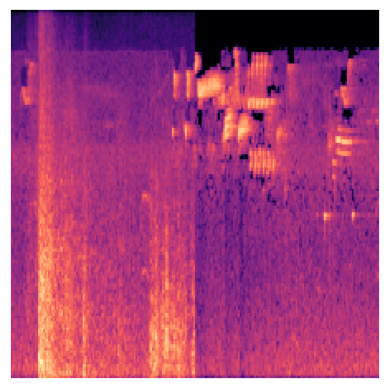

In [92]:
import librosa
print(librosa.__version__)
create_spectrogram('Sounds/storm/storm_00.wav', 'Spectrograms/sample3_nopsw.png')
from keras.preprocessing import image
x = image.load_img('Spectrograms/sample3_nopsw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

0.10.2
Loaded audio file shape: (220500,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
nopsw: 1.0
psw: 1.7046079300052856e-26


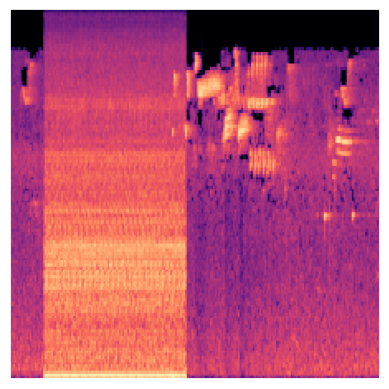

In [93]:
import librosa
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

model1=load_model("model.keras")
base_model1 = load_model("base_model.keras")
print(librosa.__version__)
create_spectrogram('Sounds/engine/engine_00.wav', 'Spectrograms/sample2_nopsw.png')

x = image.load_img('Spectrograms/sample2_nopsw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model1.predict(x)
predictions = model1.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

0.10.2
Loaded audio file shape: (441000,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
nopsw: 0.0
psw: 1.0


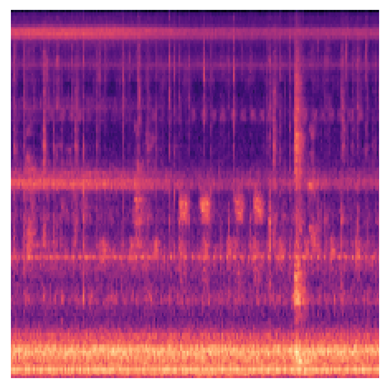

In [94]:
import librosa
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

model1=load_model("model.keras")
base_model1 = load_model("base_model.keras")
print(librosa.__version__)
create_spectrogram('psw_audio/psw_folder_1/ad_psw_2.wav', 'Spectrograms/sample1_psw.png')

x = image.load_img('Spectrograms/sample1_psw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model1.predict(x)
predictions = model1.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

0.10.2
0.10.2
Loaded audio file shape: (441000,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
nopsw: 0.0
psw: 1.0


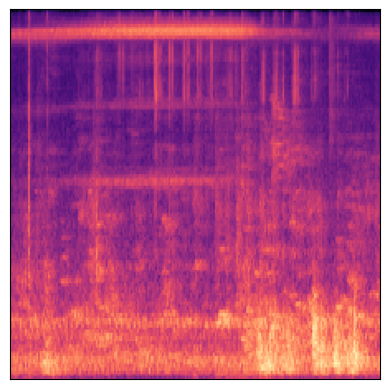

In [4]:
import librosa
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    if not os.path.exists(audio_file):
        print(f"Error: File {audio_file} not found.")
        return

    y, sr = librosa.load(audio_file)
    print("Loaded audio file shape:", y.shape)
    print("Sampling rate:", sr)

    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    if not os.path.exists(os.path.dirname(image_file)):
        os.makedirs(os.path.dirname(image_file))
        print("folder created")

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        print("folder created")

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

import librosa
print(librosa.__version__)




model1=load_model("model.keras")
base_model1 = load_model("base_model.keras")
print(librosa.__version__)
create_spectrogram('psw_audio/psw_folder_1/ad_psw_499.wav', 'Spectrograms/sample2_psw.png')

x = image.load_img('Spectrograms/sample2_psw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model1.predict(x)
predictions = model1.predict(y)
class_labels = ['nopsw', 'psw']

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

0.10.2
0.10.2
Loaded audio file shape: (441000,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
nopsw: 0.0
psw: 1.0


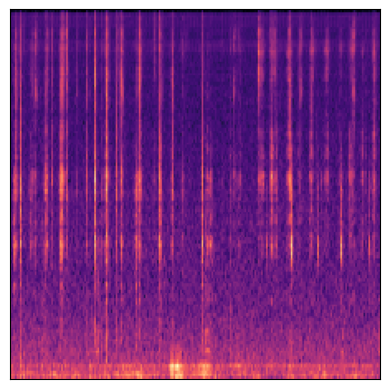

In [1]:
import librosa
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    if not os.path.exists(audio_file):
        print(f"Error: File {audio_file} not found.")
        return

    y, sr = librosa.load(audio_file)
    print("Loaded audio file shape:", y.shape)
    print("Sampling rate:", sr)

    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    if not os.path.exists(os.path.dirname(image_file)):
        os.makedirs(os.path.dirname(image_file))
        print("folder created")

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        print("folder created")

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

import librosa
print(librosa.__version__)




model1=load_model("model.keras")
base_model1 = load_model("base_model.keras")
print(librosa.__version__)
create_spectrogram('psw_audio/psw_folder_1/ad_psw_489.wav', 'Spectrograms/sample3_psw.png')

x = image.load_img('Spectrograms/sample3_psw.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model1.predict(x)
predictions = model1.predict(y)
class_labels = ['nopsw', 'psw']

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')